# DAT561 Final Project 

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the dataset here
hotels_RoomPrice = pd.read_csv("Order_details.csv", encoding='latin') # Please use your path and dataset for this parts!
Hotel_details = pd.read_csv("Property_details.csv")

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [3]:
#(1a)
Q1_a = Hotel_details.loc[Hotel_details["zipcode"] == 84100]
Q1_a.shape[0]

52

In [4]:
#(1b)
Q1_b = Q1_a.loc[:, "starrating"]
mean_sd_median_min_max = [round(Q1_b.mean(), 2), round(Q1_b.std(), 2), Q1_b.median(), Q1_b.min(), Q1_b.max()]
mean_sd_median_min_max

[2.85, 0.75, 3.0, 2, 4]

## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [5]:
#(2a)
hotels_RoomPrice["weekday"] = pd.to_datetime(hotels_RoomPrice["reservation date"], format="%m/%d/%Y").dt.day_name()
hotels_RoomPrice.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday


In [6]:
#(2b)
hotels_RoomPrice.groupby("weekday").size().nlargest(1)

weekday
Thursday    26589
dtype: int64

## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [7]:
# You can deceide whether to display you output for 3(a) and 3(b) separately or together
ammenities = {}
hotels_RoomPrice_not_null = hotels_RoomPrice[hotels_RoomPrice.roomamenities.notnull()]
for index, row in hotels_RoomPrice_not_null.iterrows():
    each_res_amm = row["roomamenities"].split(": ;")[:-1]
    for item in each_res_amm:
        if ammenities.get(item) == None:
            ammenities.update({item: 1})
        else:
            ammenities.update({item: ammenities.get(item) + 1})
top_10_common = sorted(ammenities.items(), key=lambda x: x[1], reverse=True)[:10]
for x in top_10_common:
    print("The top ten common room amenity is {}: {}".format(x[0], x[1]))

print("\n")
print("***********************************************************************************")
print("\n")

top_10_least = sorted(ammenities.items(), key=lambda x: x[1], reverse=False)[:10]
for x in top_10_least:
    print("The top ten least common room amenity is {}: {}".format(x[0], x[1]))

The top ten common room amenity is Air conditioning: 161054
The top ten common room amenity is In-room safe box: 161054
The top ten common room amenity is Free Wi-Fi in all rooms!: 157613
The top ten common room amenity is Hair dryer: 127316
The top ten common room amenity is Toiletries: 119993
The top ten common room amenity is Heating: 119196
The top ten common room amenity is Desk: 114593
The top ten common room amenity is Telephone: 113827
The top ten common room amenity is Closet: 113368
The top ten common room amenity is Towels: 106225


***********************************************************************************


The top ten least common room amenity is Open air bath privileges: 12
The top ten least common room amenity is Hot tub: 13
The top ten least common room amenity is Vending machine: 24
The top ten least common room amenity is Humidifier: 45
The top ten least common room amenity is TV [in bathroom]: 58
The top ten least common room amenity is Internet access ï¿?LA

In [8]:
# If you displayed your output of 3(b) together with 3(a) please delete this chunk
for key in ammenities:
    print("The occupation percentage of {} is {:.2f}%".format(key, ammenities[key]/hotels_RoomPrice.shape[0]*100))

The occupation percentage of Air conditioning is 97.09%
The occupation percentage of Alarm clock is 24.09%
The occupation percentage of Carpeting is 42.92%
The occupation percentage of Closet is 68.35%
The occupation percentage of Coffee/tea maker is 47.37%
The occupation percentage of Desk is 69.08%
The occupation percentage of DVD/CD player is 4.06%
The occupation percentage of Fan is 12.30%
The occupation percentage of Free Wi-Fi in all rooms! is 95.02%
The occupation percentage of Hair dryer is 76.76%
The occupation percentage of Heating is 71.86%
The occupation percentage of In-room safe box is 97.09%
The occupation percentage of Ironing facilities is 41.58%
The occupation percentage of Linens is 46.73%
The occupation percentage of Mini bar is 31.15%
The occupation percentage of Seating area is 25.57%
The occupation percentage of Toiletries is 72.34%
The occupation percentage of Towels is 64.04%
The occupation percentage of TV [flat screen] is 16.88%
The occupation percentage of F

## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [9]:
#4(a)
non_on_median = hotels_RoomPrice.loc[hotels_RoomPrice["onsiteprice"] != 0]["onsiteprice"].median()
hotels_RoomPrice["replaced onsiteprice"] = hotels_RoomPrice["onsiteprice"].apply(lambda x: x if x != 0 else non_on_median)
hotels_RoomPrice.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced onsiteprice
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday,636.09
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday,591.74
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday,881.48
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday,897.53


In [10]:
#4(b)
hotels_RoomPrice["Maximum"] = hotels_RoomPrice.groupby("propertycode")["replaced onsiteprice"].transform("max")
hotels_RoomPrice["Minimum"] = hotels_RoomPrice.groupby("propertycode")["replaced onsiteprice"].transform("min")
hotels_RoomPrice["Normalized Maximum"] = (hotels_RoomPrice["replaced onsiteprice"] - hotels_RoomPrice['Minimum']) / (hotels_RoomPrice["Maximum"] - hotels_RoomPrice['Minimum'])
Q4_b = hotels_RoomPrice.rename(columns={"propertycode":"hotelcode"})
Q4_b.to_csv("Mx_Min Price.csv", columns = ["hotelcode", "Maximum", "Minimum", "Normalized Maximum"])
hotels_RoomPrice.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced onsiteprice,Maximum,Minimum,Normalized Maximum
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36,107.70,82.360,0.000000
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday,636.09,636.09,636.090,NaN
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday,591.74,591.74,311.710,1.000000
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday,881.48,1055.92,112.195,0.815158
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday,897.53,1055.92,112.195,0.832165


## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 2 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 100 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 100 due to price fluctuation. 


In [11]:
#5(a) 
Q5 = hotels_RoomPrice.merge(Hotel_details, how = "inner", left_on = "propertycode", right_on = "propertyid")
Q5_a = Q5[(Q5["maxoccupancy"] >= 2) & (Q5["propertytype"] == "Hotels") & (Q5["closed"] == "N") & (Q5["hotelblock"] != "sold out")]
len(Q5_a.groupby("propertycode"))

6407

In [12]:
#5(b)
Q5_a["maximum replaced onsiteprice"] = Q5_a.groupby("propertycode")["replaced onsiteprice"].transform("max")
Q5_b = Q5_a[Q5_a["maximum replaced onsiteprice"] <= 100]
len(Q5_b.groupby("propertycode"))

C:\Users\Shuang Gao\AppData\Local\Temp\ipykernel_24864\3566828962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q5_a["maximum replaced onsiteprice"] = Q5_a.groupby("propertycode")["replaced onsiteprice"].transform("max")


1713

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [13]:
#(a)
Bonus = Q5
Bonus["average replaced onsiteprice"] = Q5.groupby([Q5.country, Q5.propertyid])["replaced onsiteprice"].transform("mean")
Bonus["Most Expensive"] = Q5.groupby("country")["replaced onsiteprice"].transform("max")
Bonus_a = Bonus[Bonus["Most Expensive"] == Bonus["replaced onsiteprice"]].drop_duplicates(subset = "country").loc[:, ["id", "propertyname", "city", "country", "zipcode", "address", "average replaced onsiteprice"]]
Bonus_a

,id,propertyname,city,country,zipcode,address,average replaced onsiteprice
9272,61094133,The Seven Hotel,Esch Sur Alzette,Luxembourg,4142.0,50 Galgebierg (rue du stade),229.856875
11861,62021676,Hyatt Regency Amsterdam,Amsterdam,Netherlands,NaN,Sarphatistraat 104,394.116333
13895,62123220,Aspen Golf and Ski Resort,Razlog,Bulgaria,2760.0,Betolovoto Aspen Golf,1072.850000
28312,72436790,Millennium Mayfair,London,United Kingdom,NaN,44 Grosvenor Square,1075.100769
32142,63716359,Exe Tres Cantos,Madrid,Spain,28760.0,"PLAZA DE LA ESTACION, No 2",1022.324091
33110,63971280,Locanda Ca'Lucrezia,Venice,Italy,30121.0,"Cannaregio Calle Priuli dei Cavaletti 76,",1123.194474
41402,76656081,Kreutzwald Hotel Tallinn,Tallinn,Estonia,10122.0,Endla 23,144.047615
48714,74557896,Copenhagen Island Hotel,Copenhagen,Denmark,1560.0,Kalvebod Brygge 53,228.724522
55115,69488710,Hotel Auriga,Lech,Austria,6764.0,Omesberg 330,610.034444
60780,69931926,Hotel Bila Ruze,Strakonice,Czech Republic,38601.0,Palackeho Namesti 80,676.515714


In [14]:
#(b) 
Bonus["Most Cheapest"] = Q5.groupby("country")["replaced onsiteprice"].transform("min")
Bonus_b = Bonus[Bonus["Most Cheapest"] == Bonus["replaced onsiteprice"]].drop_duplicates(subset=["country"]).loc[:, ["id", "propertyname", "city", "country", "zipcode", "address", "average replaced onsiteprice"]]
Bonus_b

,id,propertyname,city,country,zipcode,address,average replaced onsiteprice
4019,58554724,Five Elements Hostel Leipzig,Leipzig,Germany,4109.0,"Kleine Fleischergasse, 8",57.917593
6835,59960165,Atputas komplekss Lilaste,Lilaste,Latvia,NaN,"Lilaste, Saulkrastu lauku teritorija",54.974286
6935,60180868,Hanul cu Flori,Braila,Romania,810077.0,"Soseaua Focsani, Km 5",11.800000
10697,61492504,Hotel Vita,Druskininkai,Lithuania,66116.0,3 Maironio gatve,59.776111
16456,64190683,Hotel Las Leyendas,Avila,Spain,5002.0,"Francisco Gallego, 3",90.008065
22932,62453786,Hotel Fama,Hodmezovasarhely,Hungary,6800.0,Szeremlei utca 7.,26.268000
33326,64037707,Sunday Hotel Rhodes Ixia,Rhodes,Greece,NaN,Diogeni 3,52.338864
34393,64226079,Bunratty Arms B&B,Bunratty,Ireland,NaN,Bunratty,40.923333
41296,65153747,Kreutzwald Hotel Tallinn,Tallinn,Estonia,10122.0,Endla 23,144.047615
42893,65212784,HOTEL Villa Romaine,Sahy,Slovakia,NaN,13 Hlavne namestie,33.656000


## Part 2:

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets. Please make sure that these quastions are not similar with other groups...     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. 
    2. You need to answer these five questions using Python and the datasets. 
    3. You need to have at least "5" graphs to visualize your insights. 
    4. Your executive summary of your answers is well-written and makes sense. 
    5. Your business insights are very interesting and the report is creative. 


**(You need to use this cell to write your 5 questions)**

**Question 1:** What is the average starrating of hotels for every district in city Madrid, Spain?

**Question 2:** What is the reservation percentage of different weekdays in Switzerland?

**Question 3:** What is the price distribution of three different properties in the UK?

**Question 4:** What is the price distribution of hotels in Germany?

**Question 5:** What is the number of three different properties in France with the range of price [100, 200]?


In [15]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'The Average Hotel Star Ratings in Different Areas of Madrid ')

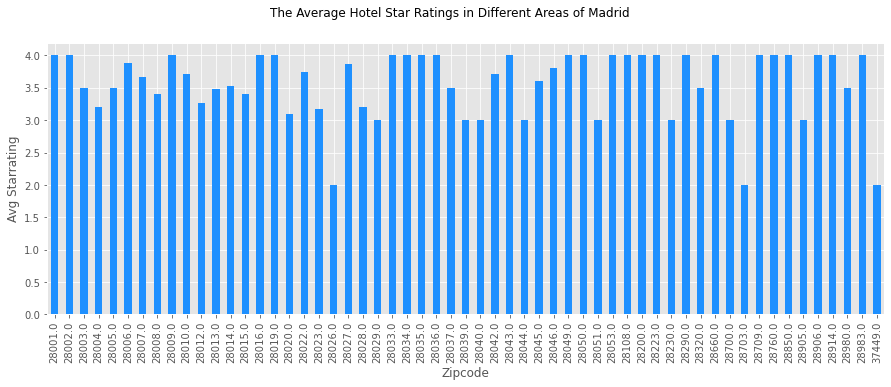

In [16]:
# Your code to answer Question 1
plt.style.use("ggplot")
fig,ax1 = plt.subplots()
part2_1 = Hotel_details[(Hotel_details.country == "Spain") & (Hotel_details.city == "Madrid") & (Hotel_details.propertytype == "Hotels")]
part2_q1 = part2_1.groupby("zipcode")["starrating"].mean()
part2_q1.plot(kind = "bar", x = "zipcode", ax=ax1, figsize = (15,5), color = "dodgerblue")
ax1.set_xlabel("Zipcode")
ax1.set_ylabel("Avg Starrating")
fig.suptitle("The Average Hotel Star Ratings in Different Areas of Madrid ")

Text(0.5, 1.0, 'Reservation Percentage of Different Weekdays in Switzerland')

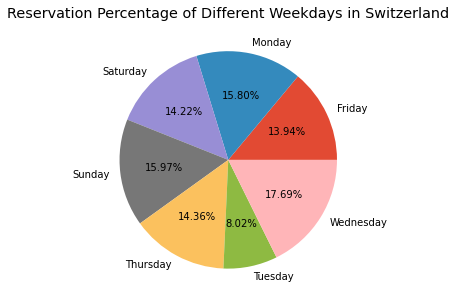

In [17]:
# Your code to answer Question 2
fig,ax2 = plt.subplots()
part2_2 = Q5[Q5["country"] == "Switzerland"]
part2_q2 = part2_2.groupby("weekday").size()
part2_q2.plot(kind = "pie", ax=ax2, autopct="%.2f%%", figsize = (10,5))
ax2.set_ylabel("")
plt.title("Reservation Percentage of Different Weekdays in Switzerland")

Text(0.5, 1.0, 'Price Distribution of Three Properties in the UK')

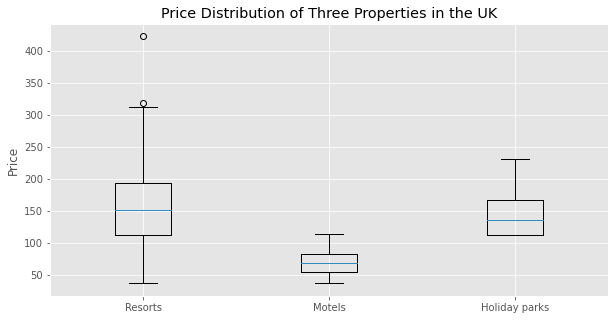

In [18]:
# Your code to answer Question 3
fig,ax3 = plt.subplots(figsize = (10,5))
part2_3 = Q5.loc[Q5["country"] == "United Kingdom"]
property_type = []
for index, row in part2_3.iterrows():
    if row.propertytype not in property_type:
         property_type.append(row.propertytype)
part2_q3_1 = part2_3.loc[part2_3.propertytype == property_type[1]]
price_1 = [row["replaced onsiteprice"] for index, row in part2_q3_1.iterrows()]
part2_q3_2 = part2_3.loc[part2_3.propertytype == property_type[2]]
price_2 = [row["replaced onsiteprice"] for index, row in part2_q3_2.iterrows()]
part2_q3_3 = part2_3.loc[part2_3.propertytype == property_type[3]]
price_3 = [row["replaced onsiteprice"] for index, row in part2_q3_3.iterrows()]
part2_q3 = [price_1, price_2, price_3]
ax3.boxplot(part2_q3)
ax3.set_xticklabels(["Resorts", "Motels", "Holiday parks"])
ax3.set_ylabel("Price")
ax3.set_title("Price Distribution of Three Properties in the UK")

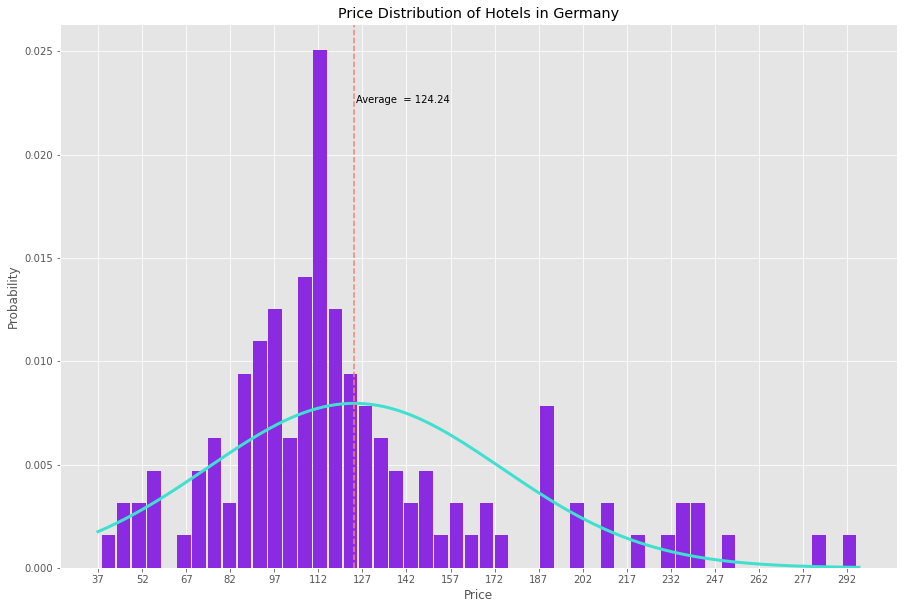

In [19]:
# Your code to answer Question 4
fig,ax4 = plt.subplots(figsize = (15,10))
part2_4 = Q5[(Q5.country == "Germany") & (Q5.propertytype != "Hotels")]
part2_q4 = part2_4.loc[:,"replaced onsiteprice"]
def sdline(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf
x = np.arange(part2_q4.min()-1, part2_q4.max()+1, 1)
y = sdline(x, part2_q4.mean(), part2_q4.std())
ax4.plot(x,y, color='turquoise',linewidth = 3)
ax4.hist(part2_q4, bins = 50, color = 'blueviolet', rwidth = 0.9, density=True)
ax4.axvline(part2_q4.mean(), color = "salmon", linestyle = "--")
text = "Average  = %0.2f" %part2_q4.mean()
ax4.annotate(text, xy=(125, 0.0225))
ax4.set_xlabel("Price")
ax4.set_ylabel("Probability")
plt.xticks(np.arange(part2_q4.min()-1, part2_q4.max()+1, 15))
plt.title("Price Distribution of Hotels in Germany")
plt.show()

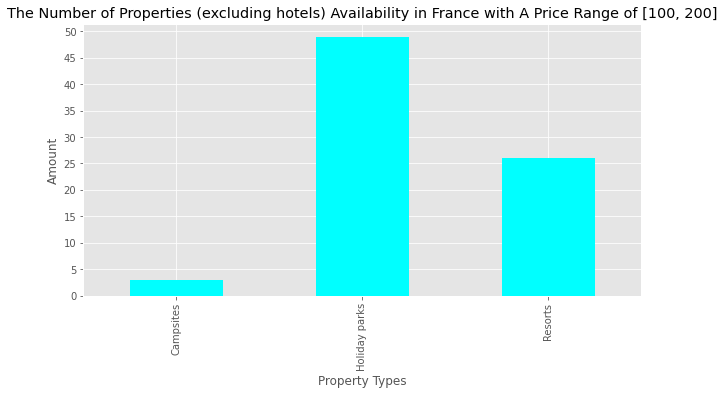

In [20]:
# Your code to answer Question 5
fig,ax5 = plt.subplots()
part2_5 = Q5[(Q5.country == "France") & (Q5.propertytype != "Hotels") & (Q5["replaced onsiteprice"] >= 100) & (Q5["replaced onsiteprice"] <= 200)]
part2_q5 = part2_5.groupby("propertytype").size()
part2_q5.plot(kind = "bar", ax=ax5, figsize = (10,5), color = "aqua")
ax5.set_xlabel("Property Types")
ax5.set_ylabel("Amount")
plt.title("The Number of Properties (excluding hotels) Availability in France with A Price Range of [100, 200]")
plt.yticks(np.arange(0, 55, 5))
plt.show()

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.




Good Luck!

**Part2_Q1**
The meaning of this graph is that when a tourist travels to Madrid, Spain, he does not know the local conditions. Still, his primary basis for choosing accommodation conditions is the overall star ratings of a district. So first, list the various districts of Madrid, then average the star ratings of the hotels in each district, and then the average score for each districtcan be obtained.

**Part2_Q2** The meaning of this graph is to analyze the number of reservations for all different weekdays in Switzerland. Customers like to book hotels on what day of the week so that properties can carry out some business strategies, such as promotions. After analysis, most reservations are on Wednesday, accounting for 17.69% of the total reservations. And the percentage of reservations on Tuesday was the least.

**Part2_Q3** The meaning of this graph is to analyze the price distribution of three different properties in the UK. We observed through the box plot that the price range of resorts is the largest, and the median is also the largest - approximately 150, and there are two outliers exceeding the upper limit. Most motels have the lowest housing prices among these three properties, and their values are basically distributed among the 25% percentile of resorts. Moreover, holiday parks are more expensive than motels, and more than half are distributed among the 25% - 75% percentile of resorts.

**Part2_Q4** The meaning of this graph is to arrange the prices of all hotels in Germany. Calculate the probability density distribution of each price range, and draw a standard distribution curve for comparison. After analysis and comparison, it is found that most hotel price is around 112, and their density probability exceeds 2.5%. Furthermore, more than half of the prices are between 67-157, and the distribution is right skewed.

**Part2_Q5** The meaning of this graph is that it is prepared for those with a budget. If a person's budget for accommodation in France is between 100 and 200, and he does not want to live in a hotel, then, in this case, the amount of each property can be seen. This model can be placed in another country or a different budget range.